Creating the smaller datasets from existing to use it inside autotrain

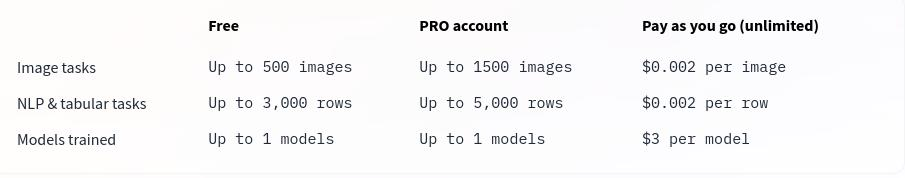

In [1]:
pip install transformers datasets > /dev/null

In [4]:
from huggingface_hub import notebook_login

notebook_login()

In [5]:
from datasets import load_dataset

#image classification

cifar = load_dataset("cifar100")

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:325: UserWarning: Downcasting array dtype uint8 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar100 downloaded and prepared to /root/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
cifar

DatasetDict({
    train: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 10000
    })
})

In [15]:
cifar_500 = cifar['train'].shuffle(seed=42).select(range(500))

In [16]:
cifar_500

Dataset({
    features: ['img', 'fine_label', 'coarse_label'],
    num_rows: 500
})

In [17]:
cifar_500.push_to_hub("cifar_500")

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
#question answering

squad_v2 = load_dataset("squad_v2")

squad_V2_3000 = squad_v2['train'].select(range(3000))

  0%|          | 0/2 [00:00<?, ?it/s]

In [22]:
squad_V2_3000.push_to_hub("squad_5000")

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
xsum = load_dataset("xsum")

  0%|          | 0/3 [00:00<?, ?it/s]

In [30]:
xsum

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

In [ ]:
xsum_3000 = xsum['train'].select(range(3000))

xsum_3000.push_to_hub("mlsum_3000")